<a href="https://colab.research.google.com/github/packetech/baracuda/blob/master/Healthcare_NDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 DATA DESCRIPTION:
The data at hand contains medical costs of people
characterized by certain attributes.

DOMAIN:
Healthcare

CONTEXT:
Leveraging customer information is paramount for most
businesses. In the case of an insurance company, attributes of
customers like the ones mentioned below can be crucial in
making business decisions. Hence, knowing to explore and
generate value out of such data can be an invaluable skill to
have.

ATTRIBUTE INFORMATION:
age : age of primary beneficiary
sex : insurance contractor gender, female, male
bmi : Body mass index, providing an understanding of body,
weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of
height to weight, ideally 18.5 to 24.9
children : Number of children covered by health insurance /
Number of dependents
smoker : Smoking
region : the beneficiary's residential area in the US, northeast,
southeast, southwest, northwest.
charges : Individual medical costs billed by health insurance.

LEARNING OUTCOMES:
● Exploratory Data Analysis
● Practicing statistics using Python
● Hypothesis testing

OBJECTIVES:
We want to see if we can dive deep into this data to find some
valuable insights.

In [ ]:
# 1. Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True, style="darkgrid")

In [ ]:
# 2. Reading the data as a data frame

insurance = pd.read_csv('insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#3. Perform basic EDA which should include the following
# a. Shape of the data (It has 1338 rows and 7 columns)

insurance.shape

(1338, 7)

In [ ]:
# b. Data type of each attribute

insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
# c. Checking the presence of missing values (There are no missing values)

insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
# d. 5 point summary of numerical attributes

# also according to min (as shown below), there are no biologically impossible zero values

insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


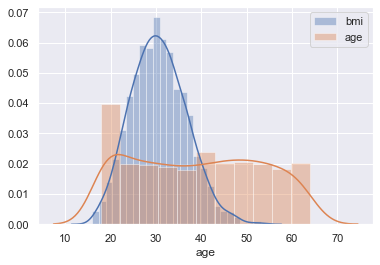

In [ ]:
# e. Distribution of ‘bmi’ and ‘age’ columns

sns.distplot(insurance['bmi'], label="bmi")
sns.distplot(insurance['age'], label="age")
plt.legend()


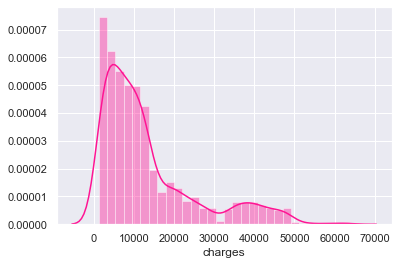

In [ ]:
# e. Distribution of ‘charges’ column

sns.distplot(insurance['charges'],color ="deeppink")


In [ ]:
# f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns.
    # The positive skewed values of each of the columns indicates an asymetrically in each of their distributions. 
    # and the tail is larger towards the right hand side of the distribution. However 'age' is very less skewed and as such
    # its distribution almost looks like a normal distribution

insurance[['bmi','age','charges']].skew()

bmi        0.284047
age        0.055673
charges    1.515880
dtype: float64

g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns
  
    #Quantitatively:
    # Given that first Quartile = Q1, third Quartile = Q3 and Inter-Quartile Range = IQR
    # Outliers will be any data point greater than Q3 + 1.5(IQR) or lower than Q1 - 1.5(IQR)

    # using the dataframe description above
    # For bmi: 34.693750 + 1.5(34.693750-26.296250) = 47.29   or   26.296250 - 1.5(34.693750-26.296250) = 13.7
    # For age: 51 + 1.5(51-27) = 87  or   27 - 1.5(51-27) = -9
    # For charges: 16639.912515 + 1.5(16639.912515-4740.287150)= 34,489.3505625‬  or 4740.287150 - 1.5(16639.912515-4740.287150 = -13,109.1508975
     

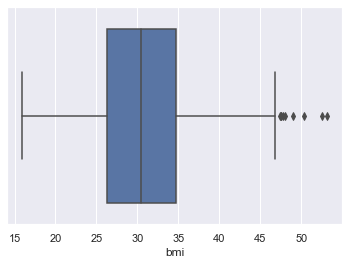

In [ ]:
# The plot below shows some outliers in 'bmi' which are beyond 47.29

sns.boxplot(insurance['bmi'])

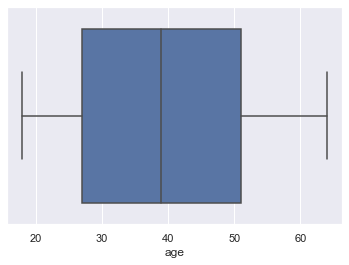

In [ ]:
# The plot below shows 'age' has no outliers

sns.boxplot(insurance['age'])


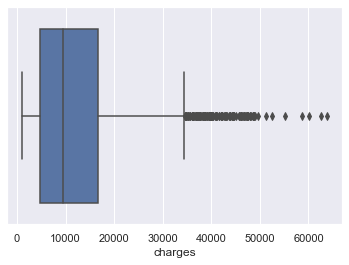

In [ ]:
# The plot below shows lots of outliers in 'charges' which are all beyond 34,489.3505625

sns.boxplot(insurance['charges'])


C:\Users\n.okorie\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


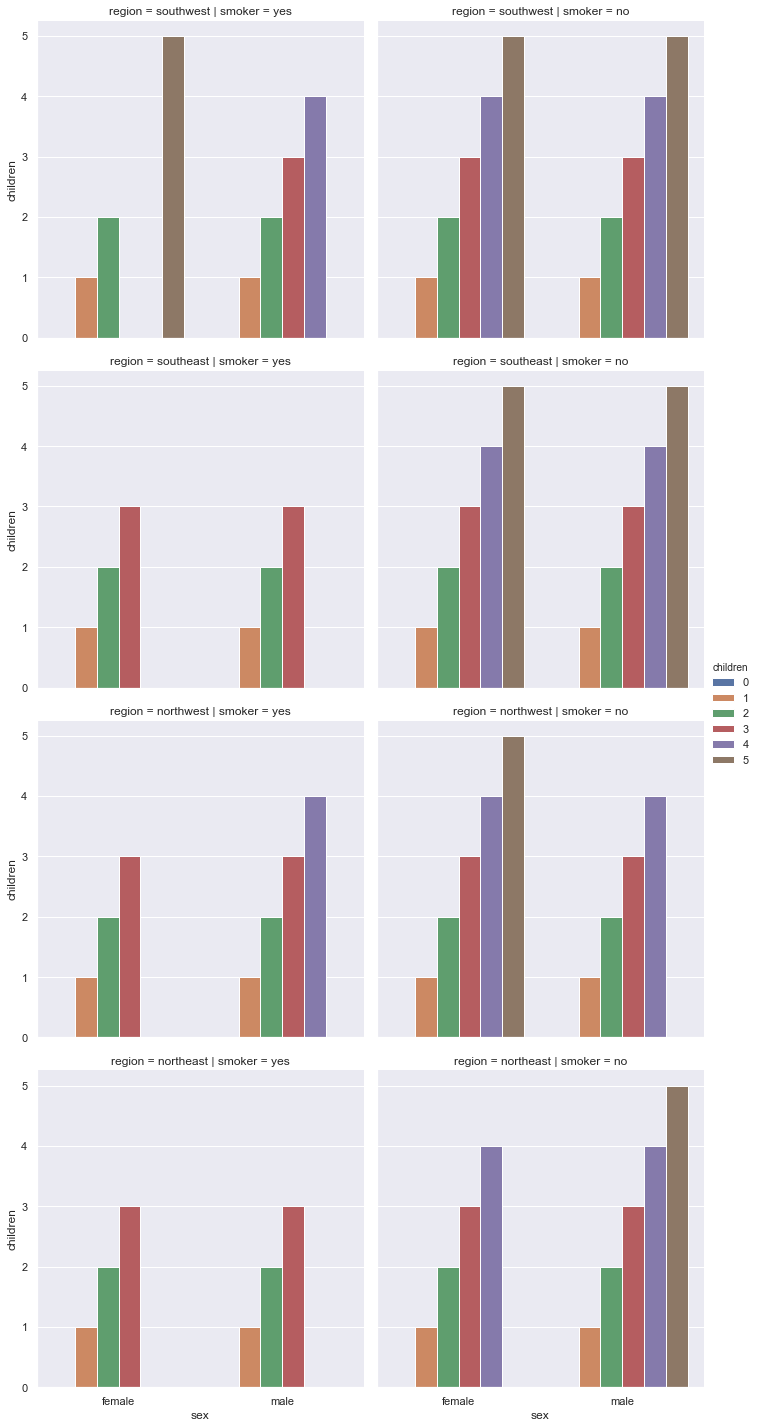

In [ ]:
# h. Distribution of categorical columns (including children): this columns are: 'sex','children','smoker' and 'region'

sns.factorplot(x = "sex",
               y = "children",
               hue = "children",
               col = "smoker",
               row = "region",
               data = insurance,
               kind = "bar"
              )

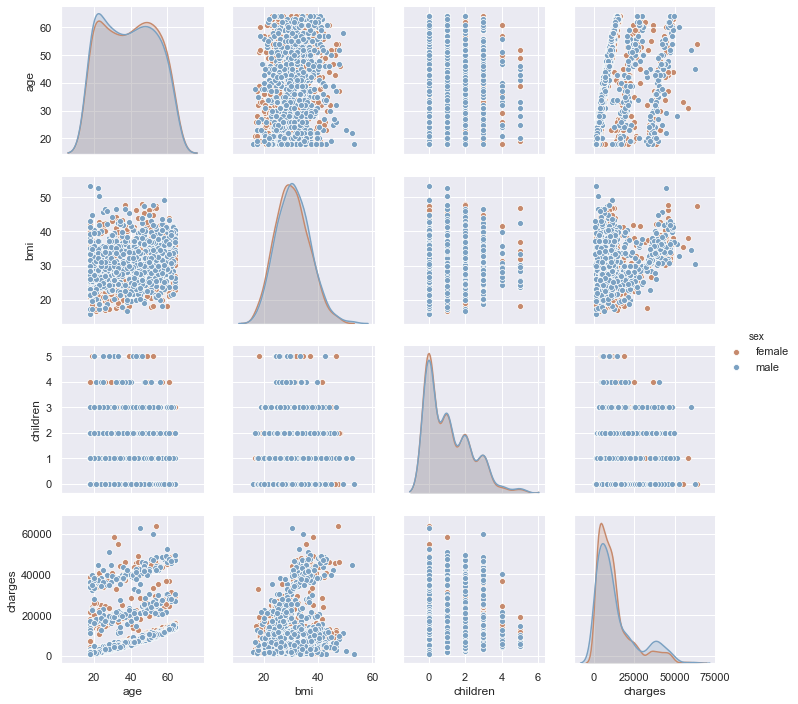

In [ ]:
# i. Pair plot that includes all the columns of the data frame

# with hue = 'sex'

sns.pairplot(insurance,hue='sex', palette="twilight_shifted_r")


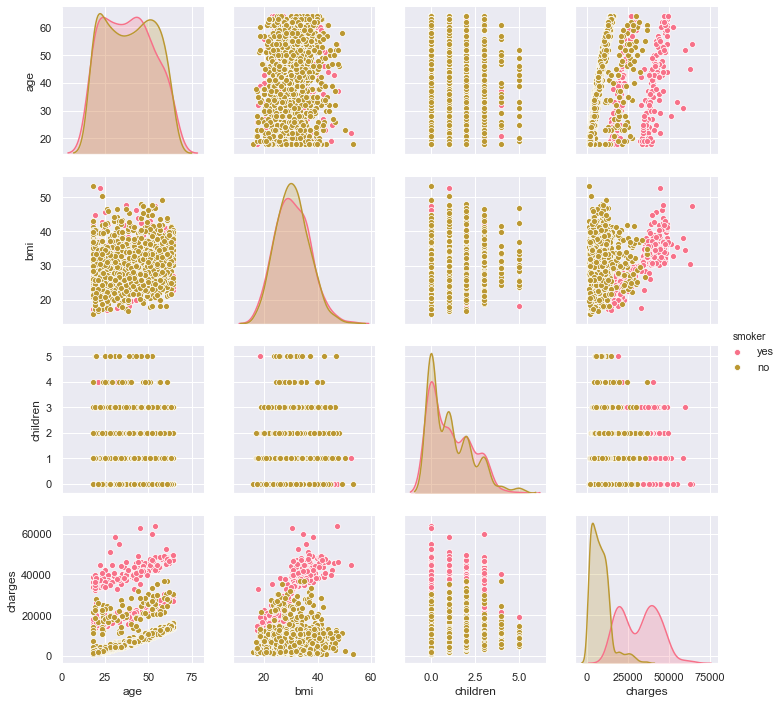

In [ ]:
# i. Pair plot that includes all the columns of the data frame

# with hue = 'smoker'
sns.set_palette("husl")
sns.pairplot(insurance,hue='smoker')

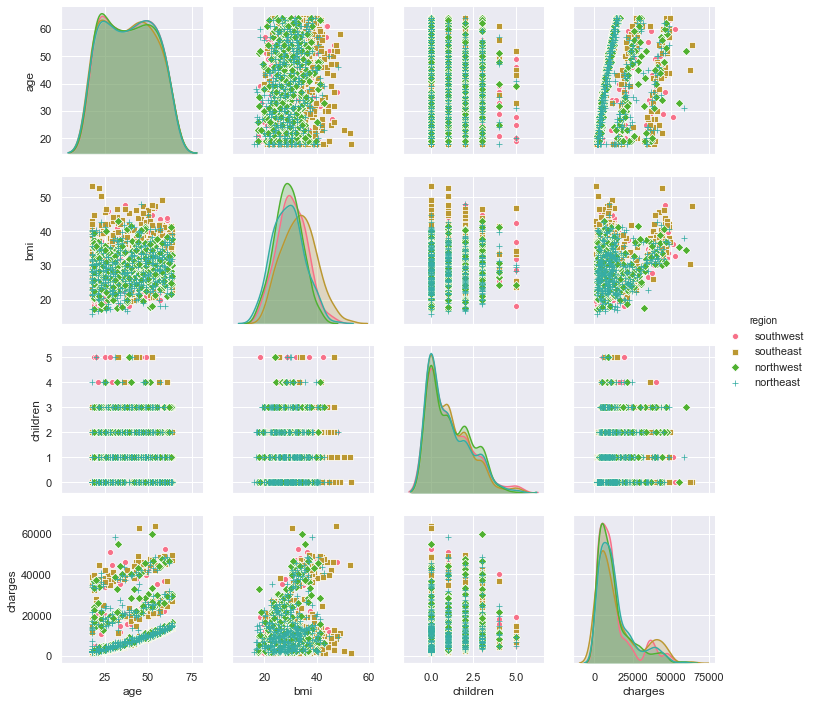

In [ ]:
# i. Pair plot that includes all the columns of the data frame

# with hue = 'region'

sns.pairplot(insurance,hue='region', markers=["o", "s", "D", "+"])

4. Answer the following questions with statistical evidence

a. Do charges of people who smoke differ significantly
from the people who don't?

Assumption: people who smoke a liable to bad health so their charges should be high

Null Hypothesis; Ho => charges_smokers = charges_non_smokers
Alternate Hypothesis; Ha => charges_smokers =/= charges_non_smokers


In [ ]:
#filter smoker and charges columns out into the dataframe df_smoker
df_smoker = pd.DataFrame(insurance)
smokers_col = [4,6]
df_smoker = df_smoker[df_smoker.columns[smokers_col]]


#filter out those that smoke from dataframe df_smoker
df_smoker_yes = pd.DataFrame(df_smoker)
df_smoker_yes = df_smoker_yes[df_smoker_yes['smoker']=='yes']


#filter out those who do not smoke from dataframe df_smoker
df_smoker_no = pd.DataFrame(df_smoker)
df_smoker_no = df_smoker_no[df_smoker_no['smoker']=='no']


In [ ]:
df_smoker.describe()

,charges
count,1338.000000
mean,13270.422265
std,12110.011237
min,1121.873900
25%,4740.287150
50%,9382.033000
75%,16639.912515
max,63770.428010


In [ ]:
df_smoker_yes.describe()

,charges
count,274.000000
mean,32050.231832
std,11541.547176
min,12829.455100
25%,20826.244213
50%,34456.348450
75%,41019.207275
max,63770.428010


In [ ]:
df_smoker_no.describe()

,charges
count,1064.000000
mean,8434.268298
std,5993.781819
min,1121.873900
25%,3986.438700
50%,7345.405300
75%,11362.887050
max,36910.608030


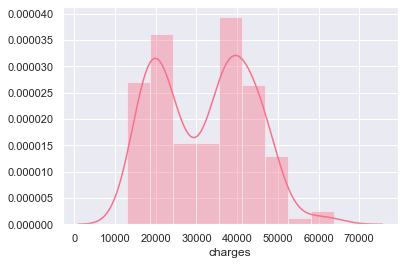

In [ ]:
# smokers
sns.distplot(df_smoker_yes['charges']) 

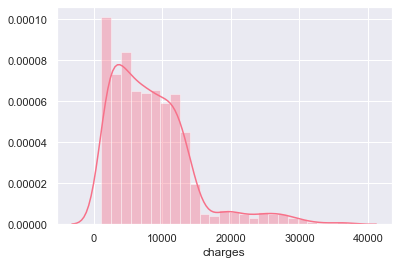

In [ ]:
# non - smokers
sns.distplot(df_smoker_no['charges'])

In [ ]:
Var_smoke=np.var(df_smoker_yes['charges'])

In [ ]:
Var_smoke

132721153.13625304

In [ ]:
Var_nonsmoke=np.var(df_smoker_no['charges'])

In [ ]:
Var_nonsmoke

35891656.00316425

In [ ]:
# Variance equality test 
F = Var_smoke/Var_nonsmoke
F

3.697827515246223

In [ ]:
# our variance are not equal so we us the formular


Both distribution could be considered normal i.e. not extremely skewed or extreme outliers
And the sample are random and large enough

so we use the t-test of mean (Unequal variances)

t = (x1 - x2)/sqr(s1^2/n1 + s2^2/n2)

where:
x1 = smoker mean 
x2 = non smoker mean
s1 = smokers variance
s2 = non smokers variance
n1 = total smokers
n2 =  total non smokers
t = 0.0029
p-value = 0.5 (50%) but out alpha (significan test is 0.05)
We do not have enough reason to reject Ho 

4b. Does bmi of males differ significantly from that of
females?
Assumption: Males are normally well built bodily than females

Ho => bmi_males = bmi_females
Ha => bmi_males =/= bmi_females

In [ ]:
#filter out sex and bml from dataframe insurance
df_sex = pd.DataFrame(insurance)
sex_col = [1,2]
df_sex = df_sex[df_sex.columns[sex_col]]

#filter out males
df_males = pd.DataFrame(df_sex)
df_males = df_males[df_males['sex']=='male']

#filter out females
df_females = pd.DataFrame(df_sex)
df_females = df_females[df_females['sex']=='female']

In [ ]:
df_sex.describe()

,bmi
count,1338.000000
mean,30.663397
std,6.098187
min,15.960000
25%,26.296250
50%,30.400000
75%,34.693750
max,53.130000


In [ ]:
df_males.describe()

,bmi
count,676.000000
mean,30.943129
std,6.140435
min,15.960000
25%,26.410000
50%,30.687500
75%,34.992500
max,53.130000


In [ ]:
df_females.describe()

,bmi
count,662.000000
mean,30.377749
std,6.046023
min,16.815000
25%,26.125000
50%,30.107500
75%,34.313750
max,48.070000


In [ ]:
# do an F test of variance
# get variance for male
var_male = np.var(df_males['bmi'])
var_male

37.6491607363954

In [ ]:
# get variance for female
var_female = np.var(df_females['bmi'])
var_female

36.49917703379856

In [ ]:
# variance is equal
F1 = var_male/var_female
F1

1.0315071132023592

so using our formular
t = (x1 - x2)/sqr(s1^2/n1 + s2^2/n2)

but now our s1 and s2 becomes a pool variance sp

sp^2 = ((n1-1)s1^2 -(n2-1)s2^2)/df

df=degree of freedome = n1+n2-2
t = 1.3578
p-value = 0.9131
our area of concern is 1-0.9131 = 0.0869 

8.7%
we do not have enough reason to reject our Ho

4 c. Is the proportion of smokers significantly different
in different genders?


Ho: smoker_male = smoker_female
Ha: smoker_male =/= smoker_female
    

In [ ]:
#filter out sex and smoker from dataframe insurance
df_sex2 = pd.DataFrame(insurance)
sex2_col = [1,4]
df_sex2 = df_sex2[df_sex2.columns[sex2_col]]

#filter out males
df_males2 = pd.DataFrame(df_sex2)
df_males2 = df_males2[df_males2['sex']=='male']
df_males2_smoke = df_males2[df_males2['smoker']=='yes']

#filter out females
df_females2 = pd.DataFrame(df_sex2)
df_females2 = df_females2[df_females2['sex']=='female']
df_females2_smoke = df_females2[df_females2['smoker']=='yes']

In [ ]:
df_males2_smoke.count()

sex       159
smoker    159
dtype: int64

In [ ]:
df_males2.count()

sex       676
smoker    676
dtype: int64

In [ ]:
df_females2_smoke.count()

sex       115
smoker    115
dtype: int64

In [ ]:
df_females2.count()

sex       662
smoker    662
dtype: int64

In [ ]:
proportion_male_smokers = 159/676

In [ ]:
proportion_male_smokers

0.23520710059171598

In [ ]:
proportion_female_smokers = 115/662

In [ ]:
proportion_female_smokers

0.17371601208459214

according to CLT mu = mu_bar = 0.24 (proportion_male_smokers)
std = sqr(mu(1-mu))
std = 0.43
std_xbar = 0.43/sqr(159) = 0.034

Z_0.17 = (0.17 - 0.24)/std_xbar = - 2.06
p-value = 0.0197 (1.9 %)

P(mu = 24 %  and x(159) = 17%) = 1.9 %

Therefore we reject Ho;  there is a significant proportional difference
in genders that smoke

4d. Is the distribution of bmi across women with no
children, one child and two children, the same ?

In [ ]:
#filter out sex, bmi and children from dataframe insurance
df_sbc = pd.DataFrame(insurance)
sbc_col = [1,2,3]
df_sbc = df_sbc[df_sbc.columns[sbc_col]]

#filter out women and their records 
df_femalesbc = pd.DataFrame(df_sbc)
df_femalesbc = df_femalesbc[df_femalesbc['sex']=='female']
df_femalesbc.describe()

,bmi,children
count,662.000000,662.000000
mean,30.377749,1.074018
std,6.046023,1.192115
min,16.815000,0.000000
25%,26.125000,0.000000
50%,30.107500,1.000000
75%,34.313750,2.000000
max,48.070000,5.000000


In [ ]:
df_femaleC0 = df_femalesbc[df_femalesbc['children']==0]

In [ ]:
df_femaleC1 = df_femalesbc[df_femalesbc['children']==1]

In [ ]:
df_femaleC2 = df_femalesbc[df_femalesbc['children']==2]

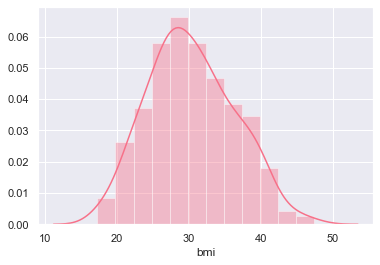

In [ ]:
sns.distplot(df_femaleC0['bmi'])

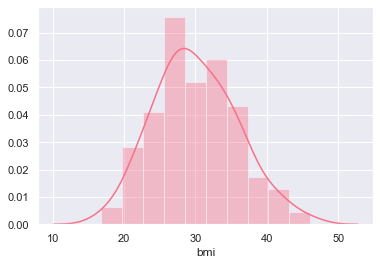

In [ ]:
sns.distplot(df_femaleC1['bmi'])

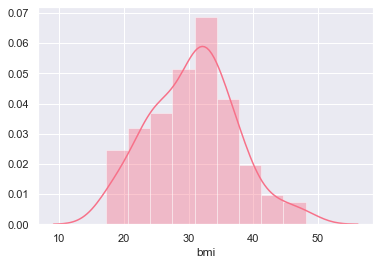

In [ ]:
sns.distplot(df_femaleC2['bmi'])

In [ ]:
df_femaleC0.describe()

,bmi,children
count,289.000000,289.0
mean,30.361522,0.0
std,5.966934,0.0
min,17.290000,0.0
25%,26.200000,0.0
50%,29.925000,0.0
75%,34.600000,0.0
max,47.410000,0.0


In [ ]:
df_femaleC1.describe()

,bmi,children
count,158.000000,158.0
mean,30.052658,1.0
std,5.786831,0.0
min,16.815000,1.0
25%,25.982500,1.0
50%,29.567500,1.0
75%,33.942500,1.0
max,46.090000,1.0


The above is graphically shown that they are fairly the same for women with 0, 1 or 2 children

But from Hypothesis testing let's see:

Ho: Dist_bmi = the same
Ha: Dist_bmi =/= the same

from CLT  mu = mu_bar = 30.38
std = 6.05
std_xbar = 6.05/sqr(289) = 0.36

finding the z-score using females with one child point
Z_df_femaleC1 = (30.05 - 30.36)/0.36 = - 0.861

p-valve = 0.1949  (i.e. 19.5 %) 

our significance level being 5%

Therefore there is not enough reason to reject Ho (the null hypothesis), which corrulates with our graphical representation.